In [14]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("results_phone.csv", names=["n", "quick_sort", "quick_select", "ratio"])

In [4]:
df.head()

,n,quick_sort,quick_select,ratio
0,1,40,120,0.333333
1,2,260,660,0.393939
2,3,2440,1300,1.876923
3,4,2580,1480,1.743243
4,5,2960,2080,1.423077


In [5]:
quick_select_df = pd.DataFrame(columns=["n", "time (ns)", "method"])
quick_sort_df = pd.DataFrame(columns=["n", "time (ns)", "method"])
quick_select_df[["n", "time (ns)"]] = df[["n", "quick_select"]]
quick_sort_df[["n", "time (ns)"]] = df[["n", "quick_sort"]]
quick_select_df["method"] = "quick select"
quick_sort_df["method"] = "quick sort"
combined_df = pd.concat([quick_select_df, quick_sort_df])

In [70]:
quick_sort_mins

,n,time (ns),n log_2 n,n^2
0,0,0.0,NaN,0
1000,1000,260.0,9.965784e+03,1000000
2000,2000,1226100.0,2.193157e+04,4000000
3000,3000,2542660.0,3.465224e+04,9000000
4000,4000,3939340.0,4.786314e+04,16000000
...,...,...,...,...
95000,95000,168362380.0,1.570886e+06,9025000000
96000,96000,181629320.0,1.588872e+06,9216000000
97000,97000,103509420.0,1.606873e+06,9409000000
98000,98000,186031480.0,1.624888e+06,9604000000


In [120]:
quick_select_mins = quick_select_df["time (ns)"].rolling(1000).min()[1000::1000]
quick_select_mins = pd.DataFrame(quick_select_mins)
quick_sort_mins = quick_sort_df["time (ns)"].rolling(1000).min()[1000::1000]
quick_sort_mins = pd.DataFrame(quick_sort_mins)
quick_select_mins["n"] = quick_select_mins.index
quick_sort_mins["n"] = quick_sort_mins.index

base_condition = pd.DataFrame({"n": [0], "time (ns)": [0]})
quick_select_mins = pd.concat([base_condition, quick_select_mins]).fillna(0)
quick_sort_mins = pd.concat([base_condition, quick_sort_mins]).fillna(0)

quick_select_mins["n log_2 n"] = quick_select_mins["n"].apply(lambda x: x * np.log2(x))
quick_sort_mins["n log_2 n"] = quick_sort_mins["n"].apply(lambda x: x * np.log2(x))
quick_sort_mins["n^2"] = quick_sort_mins["n"].apply(lambda x: x ** 2)
quick_select_mins.fillna(0, inplace=True)
quick_sort_mins.fillna(0, inplace=True)

quick_select_linreg = LinearRegression().fit(np.array([i for i in quick_select_mins.index]).reshape(-1, 1), quick_select_mins["time (ns)"])
quick_sort_linreg = LinearRegression().fit(quick_sort_mins["n log_2 n"].to_numpy().reshape(-1, 1), quick_sort_mins["time (ns)"])

In [122]:
quick_sort_out = quick_sort_linreg.predict(quick_sort_mins["n log_2 n"].to_numpy().reshape(-1, 1))
quick_select_out = quick_select_linreg.predict(quick_select_mins["n"].to_numpy().reshape(-1, 1))

In [123]:
quick_sort_mins

,n,time (ns),n log_2 n,n^2
0,0,0.0,0.000000e+00,0
1000,1000,260.0,9.965784e+03,1000000
2000,2000,1226100.0,2.193157e+04,4000000
3000,3000,2542660.0,3.465224e+04,9000000
4000,4000,3939340.0,4.786314e+04,16000000
...,...,...,...,...
95000,95000,168362380.0,1.570886e+06,9025000000
96000,96000,181629320.0,1.588872e+06,9216000000
97000,97000,103509420.0,1.606873e+06,9409000000
98000,98000,186031480.0,1.624888e+06,9604000000


In [110]:
quick_select_maxs = quick_select_df["time (ns)"].rolling(10000).max()[10000::10000]
quick_sort_maxs = quick_sort_df["time (ns)"].rolling(10000).max()[10000::10000]
quick_select_maxs = pd.DataFrame(quick_select_maxs)
quick_sort_maxs = pd.DataFrame(quick_sort_maxs)
quick_select_maxs["n"] = quick_select_maxs.index
quick_sort_maxs["n"] = quick_sort_maxs.index
quick_select_maxs = pd.concat([base_condition, quick_select_maxs]).fillna(0)
quick_sort_maxs = pd.concat([base_condition, quick_sort_maxs]).fillna(0)
quick_select_maxs["n log_2 n"] = quick_select_maxs["n"].apply(lambda x: x * np.log2(x))
quick_sort_maxs["n^2"] = quick_sort_maxs["n"].apply(lambda x: x ** 2)

quick_select_maxs.fillna(0, inplace=True)
quick_sort_maxs.fillna(0, inplace=True)

In [111]:
quick_sort_maxs

,n,time (ns),n^2
0,0,0.0,0
10000,10000,57677700.0,100000000
20000,20000,64399520.0,400000000
30000,30000,111056740.0,900000000
40000,40000,179911640.0,1600000000
50000,50000,176864000.0,2500000000
60000,60000,267673020.0,3600000000
70000,70000,226167160.0,4900000000
80000,80000,272536500.0,6400000000
90000,90000,284711080.0,8100000000


In [112]:
quick_select_linreg_worst = LinearRegression().fit(quick_select_maxs["n log_2 n"].to_numpy().reshape(-1, 1), quick_select_maxs["time (ns)"])
quick_sort_linreg_worst = LinearRegression().fit(quick_sort_maxs["n^2"].to_numpy().reshape(-1, 1), quick_sort_maxs["time (ns)"])

In [113]:
quick_select_worst_out = quick_select_linreg_worst.predict(quick_select_maxs["n log_2 n"].to_numpy().reshape(-1, 1)) - quick_select_linreg_worst.intercept_
quick_sort_worst_out = quick_sort_linreg_worst.predict(quick_sort_maxs["n^2"].to_numpy().reshape(-1, 1)) - quick_sort_linreg_worst.intercept_

In [99]:
quick_select_maxs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 10000 to 90000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time (ns)  9 non-null      float64
 1   n          9 non-null      int64  
 2   n log_2 n  9 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 348.0 bytes


In [116]:
quick_select_worst_out

array([       0.        ,  8764144.43903575, 18847424.05931221,
       29428603.01058005, 40333118.48110586, 51478064.79087161,
       62814611.56488225, 74310493.3269544 , 85942777.68717457,
       97694318.11215861])

<Axes: >

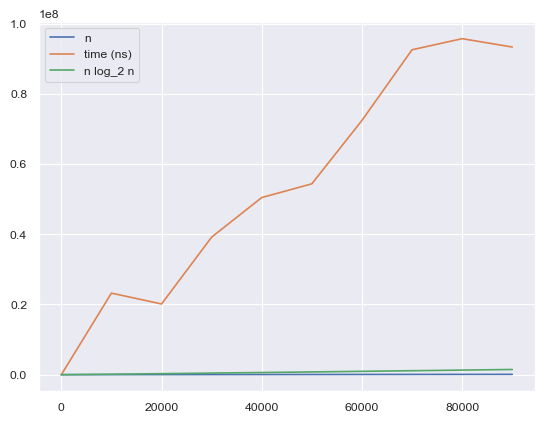

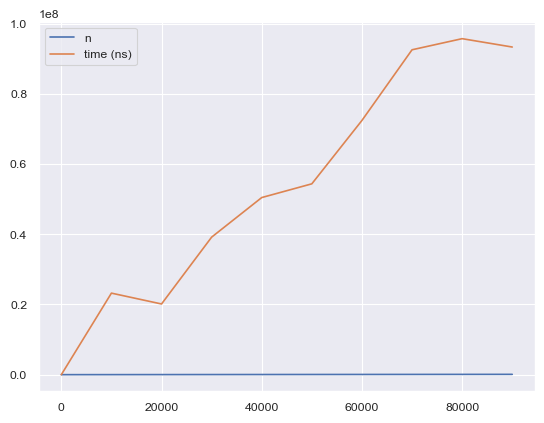

In [117]:
quick_select_maxs.plot()
quick_select_mins.plot()

In [47]:
sns.set_theme(context="paper", color_codes=True)

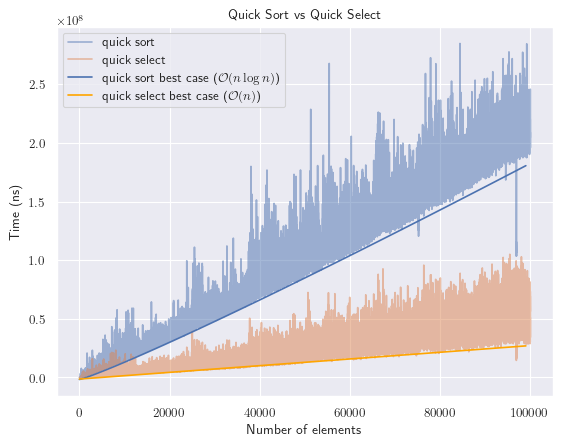

In [127]:
fig, ax = plt.subplots()
plt.rcParams["text.usetex"] = True
ax.plot(df["n"], df["quick_sort"], label="quick sort", alpha=0.5)
ax.plot(df["n"], df["quick_select"], label="quick select", alpha=0.5)
ax.plot(quick_sort_mins["n"], quick_sort_out, "b", label="quick sort best case ($\mathcal{O}(n \log n)$)")
ax.plot(quick_select_mins["n"], quick_select_out, "orange", label="quick select best case ($\mathcal{O}(n)$)")
# ax.plot(quick_sort_maxs["n"], quick_sort_worst_out, "b", label="quick sort worst case (O(n^2))")
# ax.plot(quick_select_maxs["n"], quick_select_worst_out, "orange", label="quick select worst case (O(n^2))")
ax.set_xlabel("Number of elements")
ax.set_ylabel("Time (ns)")
ax.set_title("Quick Sort vs Quick Select")
ax.legend()

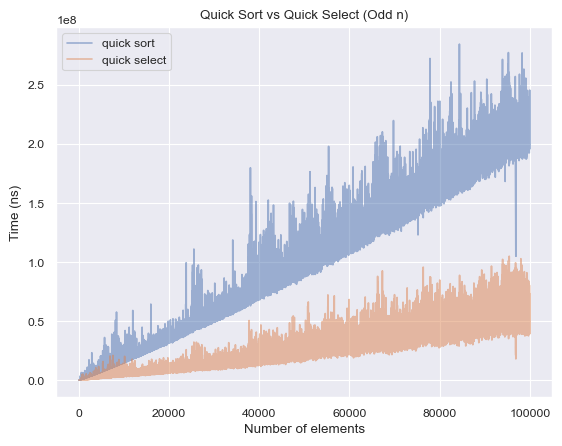

In [17]:
df_odd = df[df["n"] % 2 == 1]

fig2, ax2 = plt.subplots()
ax2.plot(df_odd["n"], df_odd["quick_sort"], label="quick sort", alpha=0.5)
ax2.plot(df_odd["n"], df_odd["quick_select"], label="quick select", alpha=0.5)
ax2.set_xlabel("Number of elements")
ax2.set_ylabel("Time (ns)")
ax2.set_title("Quick Sort vs Quick Select (Odd n)")
ax2.legend()

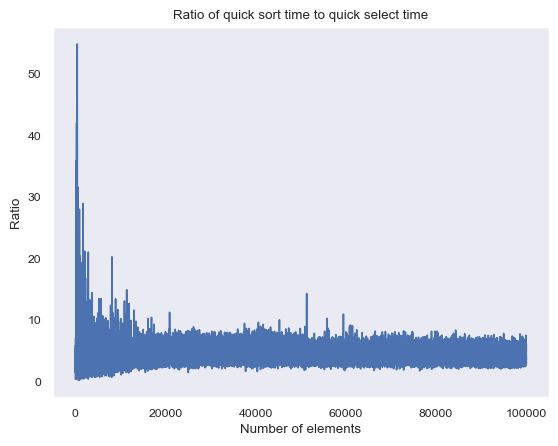

In [14]:
fig3, ax3 = plt.subplots()
ax3.plot(df["n"], df["ratio"], alpha=1)
ax3.set_title("Ratio of quick sort time to quick select time")
ax3.set_xlabel("Number of elements")
ax3.set_ylabel("Ratio")
# ax3.set_yticks(np.arange(0, 10, 1))
ax3.grid()